In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Tipos de dados:

Númericas: 

variáveis discretas: sibSp
variáveis contínuas: fare e age
binária: survived(booleano)

Categóricas:
nominais: Name, Sex
ordinal: cabin

Análise de preenchimento dos dados

In [6]:
#Avalia oq são os nulos com a area responsável pela base/ técnicas de preenchimento
print("Toatl de passageiros:", df.PassengerId.count())
print("\nTotal de informação nula na base:",df.isnull().sum().sum())
print("\nTotalde nulos por variável:\n", df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False))
print("\nTotal de linhas complementares preenchidas", df.dropna().shape[0])

Toatl de passageiros: 891

Total de informação nula na base: 866

Totalde nulos por variável:
 Cabin       687
Age         177
Embarked      2
dtype: int64

Total de linhas complementares preenchidas 183


Análise de outlier

Encontrar valores atípicos nos dados

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Vamos analisar melhor a váriavel fare. Parece que temos alguns dados discrepantes, puxando a média para cima. Observem a diferença entre média e mediana!

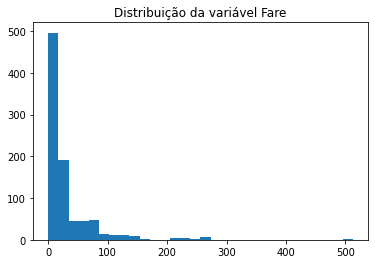

In [8]:
#Fare é variável númerica contínua logo uma boa escolha de gráfico é o histograma.
plt.hist(df.Fare, bins = 30)
plt.title('Distribuição da variável Fare')
plt.show()

In [9]:
#90% das passagens pagas são menores que 78.
np.percentile(df.Fare,90)

77.9583

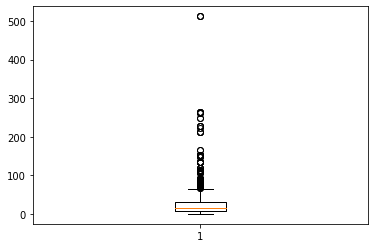

In [10]:
#Outra vizualização seria o boxplot:
plt.boxplot(df.Fare)
plt.show()

Os outliers podem acabar distorcendo nossa visão sobre um conjunto de dados. Sempre que um conjunto de dados tiver outliers, precisando de qual métrica usar para resumir os dados, qual modelo usar e também conhecer técnicas para trabalhar com eles.

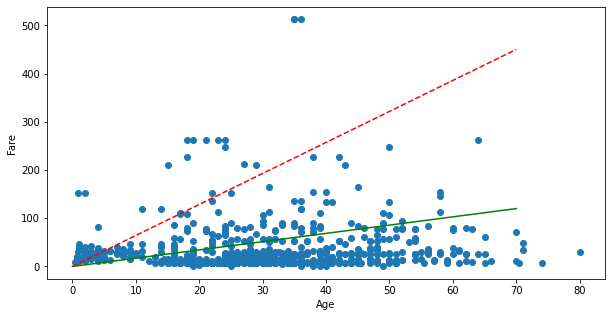

In [11]:
#Motivação com regressão linear:

plt.figure(figsize=[10,5])
plt.scatter(df.Age, df.Fare)
plt.xlabel("Age")
plt.ylabel('Fare')

plt.plot([0,70], [0,120], c='green')
plt.plot([0,70], [0,450], '--', c='red')
plt.show()

In [16]:
#Função que calcula todos os componentes do boxplot e assim é possivel identificar os outliers a partir do LS e LI.
#vejam que o 1.5 é um parâmetro. Esse valor pode ser alterado por  você de acordo com seu estudo. Só esteja ciente
# que sempre que mudar esse valor, mudamos a quantidade de outliers detectada.

def detecta_outlier(x, limite = 1.5):
    dq = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf = np.maximum(np.percentile(x, 25) - limite * dq, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * dq, np.max(x))
    print("Limite Inferior: ", limite_inf)
    print("Limite Superior: ", limite_sup)
    return np.where((x < limte_inf) | (x > limite_sup), 1, 0)

In [ ]:
outliers_fare = detecta_outlier(df.Fare)

In [ ]:
pd.Dataframe(np.c_[df.fare.values, outliers_fare], columns=['Fare', 'outlier_fare'])